# 1.0 - INTRODUCCION - Iron AIR - 2022

This is the IRON AIR project based in data collected from the WHOOP band.
En este proyecto vamos a analizar la correlacion que tienen los parametros fisiologicos con el recovery.
Como el strain puede afectar a la calidad del sueño y al recovery.

Vamos a analizar la correlacion que tienen todos estos parametros fisiologicos durante el año desde el inicio de la temporada de entrenamiento y con varias pruebas fisicas en el año hasta llegar a la prueba final que sera un IRONMan

# 2.0 - IMPORT LIBRERIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3.0 - READ DATA

In [3]:
jouarnals = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/journal_entries.csv")
physiological_cycles = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/physiological_cycles.csv")
sleeps = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/sleeps.csv")
woorkouts = pd.read_csv("/Users/adrianinfantesromero/Desktop/AIR/Work/GitHub/Iron_AIR/my_whoop_data_2022_12_14/workouts.csv")

In [4]:
jouarnals

,Cycle start time,Cycle end time,Cycle timezone,Question text,Answered yes,Notes
0,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,Receive acupuncture therapy?,False,NaN
1,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,Consume added sugar?,True,NaN
2,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,Travel on a plane?,False,NaN
3,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,Have any alcoholic drinks?,True,NaN
4,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,Take anti-anxiety medication?,False,NaN
...,...,...,...,...,...,...
5597,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,Work late?,True,NaN
5598,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,Travel on a plane?,True,NaN
5599,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,Feel emotionally and mentally stable?,False,NaN
5600,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,Experience jet lag?,True,NaN


In [5]:
physiological_cycles

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %
0,2022-12-30 04:13:31,NaN,UTC+01:00,72.0,64.0,48.0,32.32,92.82,NaN,NaN,...,15.2,464.0,583.0,210.0,101.0,153.0,119.0,504.0,45.0,79.0
1,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,79.0,65.0,50.0,32.90,96.13,4.3,2473.0,...,16.0,411.0,506.0,288.0,49.0,74.0,95.0,512.0,52.0,81.0
2,2022-12-28 04:22:27,2022-12-29 04:28:33,UTC+01:00,53.0,66.0,36.0,32.50,93.86,6.1,2592.0,...,15.1,368.0,510.0,197.0,82.0,89.0,142.0,478.0,14.0,72.0
3,2022-12-27 01:59:53,2022-12-28 04:22:27,UTC+01:00,39.0,68.0,31.0,32.40,95.21,8.4,2875.0,...,15.6,467.0,654.0,282.0,72.0,113.0,187.0,491.0,32.0,71.0
4,2022-12-26 02:17:09,2022-12-27 01:59:53,UTC+01:00,33.0,69.0,28.0,32.69,93.50,5.1,2514.0,...,15.4,436.0,573.0,357.0,27.0,52.0,137.0,492.0,32.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2021-07-18 01:05:03,2021-07-19 01:37:24,UTC+02:00,37.0,67.0,46.0,NaN,NaN,10.1,2827.0,...,16.0,305.0,422.0,105.0,76.0,124.0,117.0,618.0,123.0,72.0
504,2021-07-16 23:00:45,2021-07-18 01:05:03,UTC+02:00,40.0,64.0,46.0,NaN,NaN,15.1,3682.0,...,15.8,373.0,454.0,170.0,86.0,117.0,81.0,644.0,176.0,82.0
505,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,24.0,71.0,37.0,NaN,NaN,9.6,2158.0,...,15.4,115.0,158.0,87.0,25.0,3.0,43.0,508.0,139.0,72.0
506,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,26.0,72.0,34.0,NaN,NaN,13.4,3215.0,...,16.5,147.0,173.0,85.0,33.0,29.0,26.0,381.0,35.0,85.0


In [6]:
woorkouts

,Cycle start time,Cycle end time,Cycle timezone,Workout start time,Workout end time,Duration (min),Activity name,Activity Strain,Energy burned (cal),Max HR (bpm),Average HR (bpm),HR Zone 1 %,HR Zone 2 %,HR Zone 3 %,HR Zone 4 %,HR Zone 5 %,GPS enabled,Distance (meters),Altitude gain (meters),Altitude change (meters)
0,2022-12-22 04:14:45,2022-12-23 22:05:13,UTC+01:00,2022-12-23 17:56:05,2022-12-23 18:36:40,40,Weightlifting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,2022-12-21 04:26:42,2022-12-22 04:14:45,UTC+01:00,2022-12-21 14:49:15,2022-12-21 15:29:41,40,Weightlifting,4.7,115.0,145.0,104.0,20.0,54.0,22.0,2.0,0.0,False,NaN,NaN,NaN
2,2022-12-19 02:46:11,2022-12-20 04:42:03,UTC+01:00,2022-12-19 19:37:37,2022-12-19 20:05:56,28,Weightlifting,5.9,194.0,150.0,125.0,0.0,6.0,70.0,22.0,0.0,False,NaN,NaN,NaN
3,2022-12-17 02:01:24,2022-12-18 00:52:14,UTC+01:00,2022-12-17 14:02:39,2022-12-17 14:35:43,33,Weightlifting,6.7,250.0,165.0,127.0,1.0,7.0,49.0,38.0,2.0,False,NaN,NaN,NaN
4,2022-12-11 04:19:07,2022-12-12 04:28:17,UTC+01:00,2022-12-11 13:09:39,2022-12-11 13:52:10,42,Weightlifting,6.1,221.0,149.0,120.0,1.0,23.0,61.0,13.0,0.0,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2021-07-31 01:31:51,2021-08-01 01:54:10,UTC+02:00,2021-07-31 20:28:56,2021-07-31 21:01:16,32,Running,8.1,298.0,158.0,134.0,0.0,11.0,16.0,68.0,3.0,False,NaN,NaN,NaN
393,2021-07-29 01:54:27,2021-07-30 00:33:28,UTC+02:00,2021-07-29 20:24:41,2021-07-29 20:50:59,26,Running,8.8,305.0,169.0,144.0,0.0,0.0,7.0,62.0,28.0,False,NaN,NaN,NaN
394,2021-07-26 23:07:56,2021-07-28 00:33:28,UTC+02:00,2021-07-27 20:25:35,2021-07-27 21:00:11,34,Activity,8.5,326.0,165.0,135.0,0.0,2.0,33.0,54.0,9.0,False,NaN,NaN,NaN
395,2021-07-19 01:37:24,2021-07-19 23:47:00,UTC+02:00,2021-07-19 08:11:56,2021-07-19 08:55:32,43,Running,9.6,390.0,171.0,133.0,0.0,5.0,39.0,31.0,23.0,False,NaN,NaN,NaN


In [7]:
sleeps

,Cycle start time,Cycle end time,Cycle timezone,Sleep onset,Wake onset,Sleep performance %,Respiratory rate (rpm),Asleep duration (min),In bed duration (min),Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,Nap
0,2022-12-30 04:13:31,NaN,UTC+01:00,2022-12-30 04:13:31,2022-12-30 13:56:04,92.0,15.2,464.0,583.0,210.0,101.0,153.0,119.0,504.0,45.0,79.0,False
1,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,2022-12-29 04:28:33,2022-12-29 12:54:40,80.0,16.0,411.0,506.0,288.0,49.0,74.0,95.0,512.0,52.0,81.0,False
2,2022-12-28 04:22:27,2022-12-29 04:28:33,UTC+01:00,2022-12-28 04:22:27,2022-12-28 12:53:08,77.0,15.1,368.0,510.0,197.0,82.0,89.0,142.0,478.0,14.0,72.0,False
3,2022-12-27 01:59:53,2022-12-28 04:22:27,UTC+01:00,2022-12-27 01:59:53,2022-12-27 12:54:41,95.0,15.6,467.0,654.0,282.0,72.0,113.0,187.0,491.0,32.0,71.0,False
4,2022-12-26 02:17:09,2022-12-27 01:59:53,UTC+01:00,2022-12-26 02:17:09,2022-12-26 11:50:39,89.0,15.4,436.0,573.0,357.0,27.0,52.0,137.0,492.0,32.0,76.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2021-07-16 23:00:45,2021-07-18 01:05:03,UTC+02:00,2021-07-16 23:00:45,2021-07-17 06:34:33,58.0,15.8,373.0,454.0,170.0,86.0,117.0,81.0,644.0,176.0,82.0,False
531,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,2021-07-16 04:21:47,2021-07-16 06:59:49,23.0,15.4,115.0,158.0,87.0,25.0,3.0,43.0,508.0,139.0,72.0,False
532,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,2021-07-15 15:43:36,2021-07-15 17:50:51,19.0,14.2,115.0,127.0,65.0,19.0,31.0,12.0,607.0,139.0,94.0,True
533,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,2021-07-15 03:42:30,2021-07-15 06:35:53,39.0,16.5,147.0,173.0,85.0,33.0,29.0,26.0,381.0,35.0,85.0,False


Just after reading these first csv we realize that the phisiological_cycles dataset gives us almost 99% of the same data as the sleeps dataset

# 4.0 - ANALISING DATA - JOUARNALS

In [8]:
jouarnals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5602 entries, 0 to 5601
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cycle start time  5602 non-null   object 
 1   Cycle end time    5602 non-null   object 
 2   Cycle timezone    5602 non-null   object 
 3   Question text     5602 non-null   object 
 4   Answered yes      5602 non-null   bool   
 5   Notes             0 non-null      float64
dtypes: bool(1), float64(1), object(4)
memory usage: 224.4+ KB


In [9]:
jouarnals.count()

Cycle start time    5602
Cycle end time      5602
Cycle timezone      5602
Question text       5602
Answered yes        5602
Notes                  0
dtype: int64

In [10]:
jouarnals.isnull().sum()

Cycle start time       0
Cycle end time         0
Cycle timezone         0
Question text          0
Answered yes           0
Notes               5602
dtype: int64

# 4.1 - ANALISING DATA - physiological_cycles

In [11]:
physiological_cycles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cycle start time             508 non-null    object 
 1   Cycle end time               507 non-null    object 
 2   Cycle timezone               508 non-null    object 
 3   Recovery score %             468 non-null    float64
 4   Resting heart rate (bpm)     468 non-null    float64
 5   Heart rate variability (ms)  468 non-null    float64
 6   Skin temp (celsius)          278 non-null    float64
 7   Blood oxygen %               278 non-null    float64
 8   Day Strain                   489 non-null    float64
 9   Energy burned (cal)          497 non-null    float64
 10  Max HR (bpm)                 497 non-null    float64
 11  Average HR (bpm)             497 non-null    float64
 12  Sleep onset                  468 non-null    object 
 13  Wake onset          

In [12]:
physiological_cycles.count()

Cycle start time               508
Cycle end time                 507
Cycle timezone                 508
Recovery score %               468
Resting heart rate (bpm)       468
Heart rate variability (ms)    468
Skin temp (celsius)            278
Blood oxygen %                 278
Day Strain                     489
Energy burned (cal)            497
Max HR (bpm)                   497
Average HR (bpm)               497
Sleep onset                    468
Wake onset                     468
Sleep performance %            468
Respiratory rate (rpm)         468
Asleep duration (min)          468
In bed duration (min)          468
Light sleep duration (min)     468
Deep (SWS) duration (min)      468
REM duration (min)             468
Awake duration (min)           468
Sleep need (min)               468
Sleep debt (min)               468
Sleep efficiency %             468
dtype: int64

In [13]:
physiological_cycles.isnull().sum()

Cycle start time                 0
Cycle end time                   1
Cycle timezone                   0
Recovery score %                40
Resting heart rate (bpm)        40
Heart rate variability (ms)     40
Skin temp (celsius)            230
Blood oxygen %                 230
Day Strain                      19
Energy burned (cal)             11
Max HR (bpm)                    11
Average HR (bpm)                11
Sleep onset                     40
Wake onset                      40
Sleep performance %             40
Respiratory rate (rpm)          40
Asleep duration (min)           40
In bed duration (min)           40
Light sleep duration (min)      40
Deep (SWS) duration (min)       40
REM duration (min)              40
Awake duration (min)            40
Sleep need (min)                40
Sleep debt (min)                40
Sleep efficiency %              40
dtype: int64

# 4.2 - ANALISING DATA - WorkOuts

In [14]:
woorkouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cycle start time          397 non-null    object 
 1   Cycle end time            397 non-null    object 
 2   Cycle timezone            397 non-null    object 
 3   Workout start time        397 non-null    object 
 4   Workout end time          397 non-null    object 
 5   Duration (min)            397 non-null    int64  
 6   Activity name             397 non-null    object 
 7   Activity Strain           337 non-null    float64
 8   Energy burned (cal)       362 non-null    float64
 9   Max HR (bpm)              362 non-null    float64
 10  Average HR (bpm)          362 non-null    float64
 11  HR Zone 1 %               362 non-null    float64
 12  HR Zone 2 %               362 non-null    float64
 13  HR Zone 3 %               362 non-null    float64
 14  HR Zone 4 

In [15]:
woorkouts.count()

Cycle start time            397
Cycle end time              397
Cycle timezone              397
Workout start time          397
Workout end time            397
Duration (min)              397
Activity name               397
Activity Strain             337
Energy burned (cal)         362
Max HR (bpm)                362
Average HR (bpm)            362
HR Zone 1 %                 362
HR Zone 2 %                 362
HR Zone 3 %                 362
HR Zone 4 %                 362
HR Zone 5 %                 362
GPS enabled                 397
Distance (meters)             1
Altitude gain (meters)        1
Altitude change (meters)      1
dtype: int64

In [16]:
woorkouts.isnull().sum()

Cycle start time              0
Cycle end time                0
Cycle timezone                0
Workout start time            0
Workout end time              0
Duration (min)                0
Activity name                 0
Activity Strain              60
Energy burned (cal)          35
Max HR (bpm)                 35
Average HR (bpm)             35
HR Zone 1 %                  35
HR Zone 2 %                  35
HR Zone 3 %                  35
HR Zone 4 %                  35
HR Zone 5 %                  35
GPS enabled                   0
Distance (meters)           396
Altitude gain (meters)      396
Altitude change (meters)    396
dtype: int64

4.2 - ANALISING DATA - Sleeps

In [17]:
sleeps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cycle start time            535 non-null    object 
 1   Cycle end time              534 non-null    object 
 2   Cycle timezone              535 non-null    object 
 3   Sleep onset                 535 non-null    object 
 4   Wake onset                  535 non-null    object 
 5   Sleep performance %         531 non-null    float64
 6   Respiratory rate (rpm)      530 non-null    float64
 7   Asleep duration (min)       531 non-null    float64
 8   In bed duration (min)       531 non-null    float64
 9   Light sleep duration (min)  531 non-null    float64
 10  Deep (SWS) duration (min)   531 non-null    float64
 11  REM duration (min)          531 non-null    float64
 12  Awake duration (min)        531 non-null    float64
 13  Sleep need (min)            531 non

In [18]:
sleeps.count()

Cycle start time              535
Cycle end time                534
Cycle timezone                535
Sleep onset                   535
Wake onset                    535
Sleep performance %           531
Respiratory rate (rpm)        530
Asleep duration (min)         531
In bed duration (min)         531
Light sleep duration (min)    531
Deep (SWS) duration (min)     531
REM duration (min)            531
Awake duration (min)          531
Sleep need (min)              531
Sleep debt (min)              531
Sleep efficiency %            531
Nap                           535
dtype: int64

In [19]:
sleeps.isnull().sum()

Cycle start time              0
Cycle end time                1
Cycle timezone                0
Sleep onset                   0
Wake onset                    0
Sleep performance %           4
Respiratory rate (rpm)        5
Asleep duration (min)         4
In bed duration (min)         4
Light sleep duration (min)    4
Deep (SWS) duration (min)     4
REM duration (min)            4
Awake duration (min)          4
Sleep need (min)              4
Sleep debt (min)              4
Sleep efficiency %            4
Nap                           0
dtype: int64

# 5.0 - EDA Analysing Data [PHYSIOLOGICAL CYCLES] - 1 Variable cuantitativa

## Conversion a fechas

In [23]:
physiological_cycles

,Cycle start time,Cycle end time,Cycle timezone,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Skin temp (celsius),Blood oxygen %,Day Strain,Energy burned (cal),...,Light sleep duration (min),Deep (SWS) duration (min),REM duration (min),Awake duration (min),Sleep need (min),Sleep debt (min),Sleep efficiency %,month,day,year
0,2022-12-30 04:13:31,NaN,UTC+01:00,72.0,64.0,48.0,32.32,92.82,NaN,NaN,...,210.0,101.0,153.0,119.0,504.0,45.0,79.0,12,30,2022
1,2022-12-29 04:28:33,2022-12-30 04:13:31,UTC+01:00,79.0,65.0,50.0,32.90,96.13,4.3,2473.0,...,288.0,49.0,74.0,95.0,512.0,52.0,81.0,12,29,2022
2,2022-12-28 04:22:27,2022-12-29 04:28:33,UTC+01:00,53.0,66.0,36.0,32.50,93.86,6.1,2592.0,...,197.0,82.0,89.0,142.0,478.0,14.0,72.0,12,28,2022
3,2022-12-27 01:59:53,2022-12-28 04:22:27,UTC+01:00,39.0,68.0,31.0,32.40,95.21,8.4,2875.0,...,282.0,72.0,113.0,187.0,491.0,32.0,71.0,12,27,2022
4,2022-12-26 02:17:09,2022-12-27 01:59:53,UTC+01:00,33.0,69.0,28.0,32.69,93.50,5.1,2514.0,...,357.0,27.0,52.0,137.0,492.0,32.0,76.0,12,26,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,2021-07-18 01:05:03,2021-07-19 01:37:24,UTC+02:00,37.0,67.0,46.0,NaN,NaN,10.1,2827.0,...,105.0,76.0,124.0,117.0,618.0,123.0,72.0,7,18,2021
504,2021-07-16 23:00:45,2021-07-18 01:05:03,UTC+02:00,40.0,64.0,46.0,NaN,NaN,15.1,3682.0,...,170.0,86.0,117.0,81.0,644.0,176.0,82.0,7,16,2021
505,2021-07-16 04:21:47,2021-07-16 23:00:45,UTC+02:00,24.0,71.0,37.0,NaN,NaN,9.6,2158.0,...,87.0,25.0,3.0,43.0,508.0,139.0,72.0,7,16,2021
506,2021-07-15 03:42:30,2021-07-16 04:21:47,UTC+02:00,26.0,72.0,34.0,NaN,NaN,13.4,3215.0,...,85.0,33.0,29.0,26.0,381.0,35.0,85.0,7,15,2021


In [24]:
physiological_cycles["Cycle start time"] = pd.to_datetime(physiological_cycles["Cycle start time"])

In [25]:
physiological_cycles["month"] = physiological_cycles["Cycle start time"].dt.month
physiological_cycles["day"] = physiological_cycles["Cycle start time"].dt.day
physiological_cycles["year"] = physiological_cycles["Cycle start time"].dt.year

## 5.1 - EDA Analysing Data [Recovery %]

In [26]:
physiological_cycles.groupby("month")["Recovery score %"].mean()

month
1     58.814815
2     55.464286
3     60.000000
4     51.000000
5     72.411765
6     66.448276
7     50.500000
8     56.956522
9     58.689655
10    57.696429
11    52.725490
12    53.519231
Name: Recovery score %, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Recovery score %'>

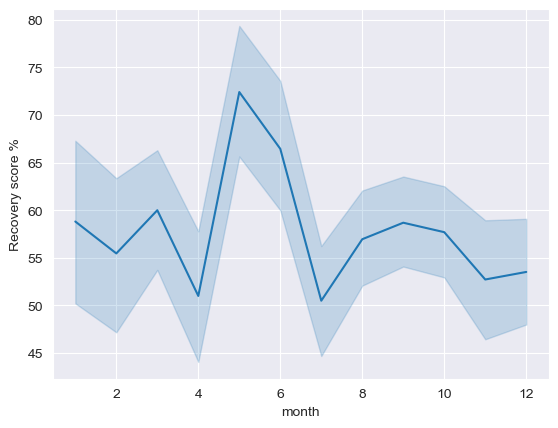

In [27]:
sns.lineplot(x='month', y='Recovery score %', data=physiological_cycles, ci=95)

En este primer analisis podemos encontrar algumos de los primeros datos:
- Al parecer el mes 5, 6 y 3 son los que mas alto % de recovery hemos encontrado
- El resto de meses podemos observar que tenemos un recovery entorno al 50%

## 5.2 - Analysing Data [Resting heart rate (bpm)]

In [30]:
physiological_cycles.groupby("month")["Resting heart rate (bpm)"].mean()

month
1     68.814815
2     68.000000
3     65.700000
4     66.250000
5     65.000000
6     65.655172
7     67.239130
8     66.456522
9     66.310345
10    64.732143
11    67.901961
12    67.769231
Name: Resting heart rate (bpm), dtype: float64

<AxesSubplot:xlabel='month', ylabel='Resting heart rate (bpm)'>

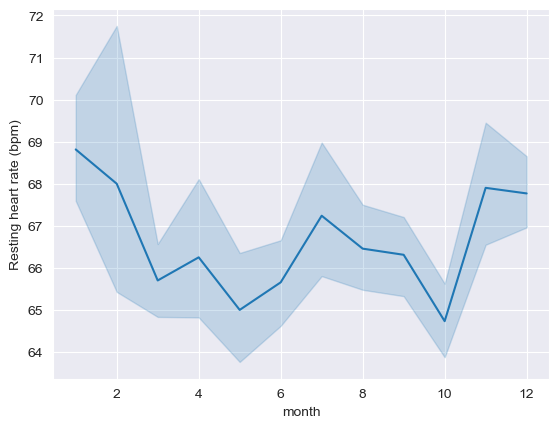

In [31]:
sns.lineplot(x='month', y='Resting heart rate (bpm)', data=physiological_cycles, ci=95)

## 5.3 - Analysing Data [Heart rate variability (ms)]

In [34]:
physiological_cycles.groupby("month")["Heart rate variability (ms)"].mean()

month
1     38.037037
2     35.392857
3     44.100000
4     38.357143
5     44.000000
6     52.413793
7     49.673913
8     44.326087
9     42.586207
10    43.964286
11    41.588235
12    43.173077
Name: Heart rate variability (ms), dtype: float64

<AxesSubplot:xlabel='month', ylabel='Heart rate variability (ms)'>

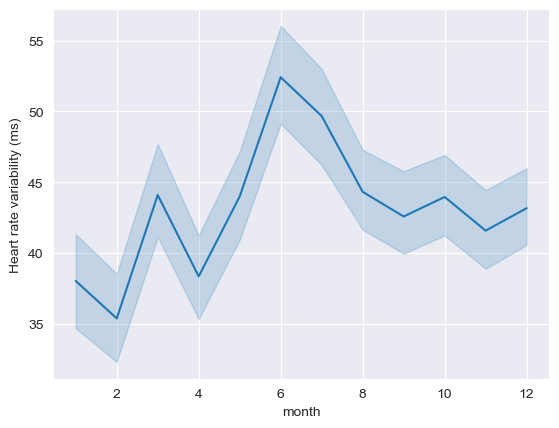

In [35]:
sns.lineplot(x='month', y='Heart rate variability (ms)', data=physiological_cycles, ci=95)

## 5.4 - Analysing Data [Skin temp (celsius)]

In [37]:
physiological_cycles.groupby("month")["Skin temp (celsius)"].mean()

month
1           NaN
2     32.420769
3     32.332333
4     32.533214
5     32.319412
6     32.382414
7     32.056452
8     32.012593
9     31.917500
10    31.867600
11    32.210909
12    32.655714
Name: Skin temp (celsius), dtype: float64

<AxesSubplot:xlabel='month', ylabel='Skin temp (celsius)'>

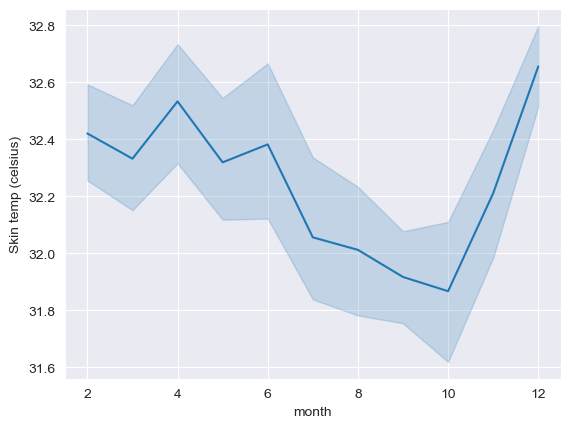

In [38]:
sns.lineplot(x='month', y='Skin temp (celsius)', data=physiological_cycles, ci=95)

## 5.5 - Analysing Data [Sleep performance %]

In [42]:
physiological_cycles.groupby("month")["Sleep performance %"].mean()

month
1     73.259259
2     74.107143
3     55.066667
4     78.178571
5     71.058824
6     71.310345
7     64.847826
8     65.913043
9     69.862069
10    64.839286
11    67.843137
12    63.750000
Name: Sleep performance %, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Sleep performance %'>

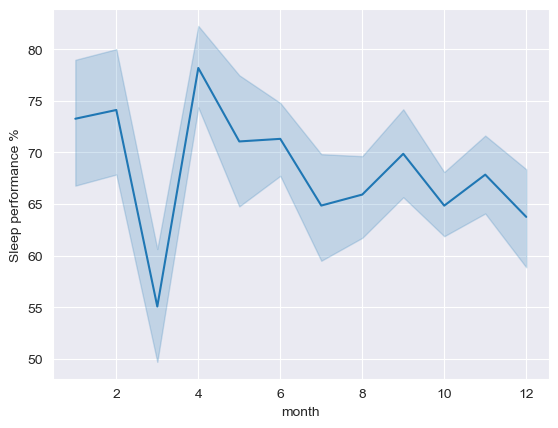

In [43]:
sns.lineplot(x='month', y='Sleep performance %', data=physiological_cycles, ci=95)

## 5.6 - Analysing Data [Respiratory rate (rpm)

In [44]:
physiological_cycles.groupby("month")["Respiratory rate (rpm)"].mean()

month
1     15.677778
2     15.085714
3     15.216667
4     15.175000
5     15.629412
6     16.324138
7     16.291304
8     15.643478
9     15.322414
10    15.182143
11    15.660784
12    15.821154
Name: Respiratory rate (rpm), dtype: float64

<AxesSubplot:xlabel='month', ylabel='Respiratory rate (rpm)'>

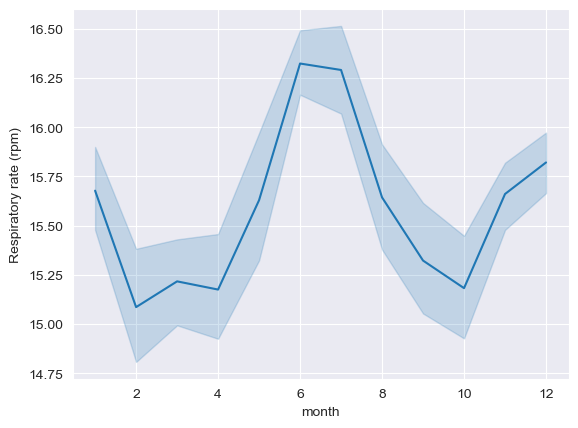

In [47]:
sns.lineplot(x='month', y='Respiratory rate (rpm)', data=physiological_cycles, ci=95)

## 5.7 - Analysing Data [Sleep efficiency %]

In [48]:
physiological_cycles.groupby("month")["Sleep efficiency %"].mean()

month
1     81.777778
2     78.857143
3     79.433333
4     81.214286
5     83.823529
6     81.448276
7     76.695652
8     79.630435
9     80.086207
10    79.839286
11    76.901961
12    76.634615
Name: Sleep efficiency %, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Sleep efficiency %'>

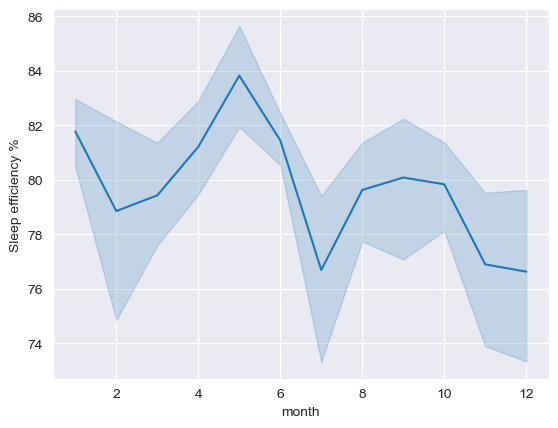

In [49]:
sns.lineplot(x='month', y='Sleep efficiency %', data=physiological_cycles, ci=95)

Hasta aqui son variables que analizan:
- Recovery
- Respiracion
- Pulso en reposo
- Descanso y su puntuacion
Todos ellos relacionados directamente con el recovery.

## 5.8 - Analysing Data [Day strain]

In [40]:
physiological_cycles.groupby("month")["Day Strain"].mean()

month
1      7.192857
2      8.992857
3     10.887097
4      9.082759
5      8.650000
6      9.465517
7      9.583673
8      6.935294
9      8.652542
10     8.445763
11     7.401818
12     7.192453
Name: Day Strain, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Day Strain'>

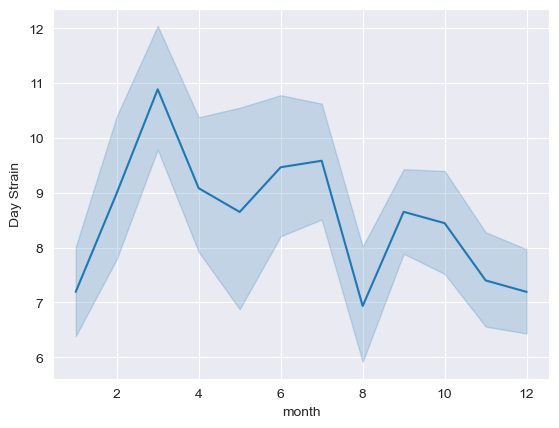

In [41]:
sns.lineplot(x='month', y='Day Strain', data=physiological_cycles, ci=95)

## 5.9 - Analysing Data [Energy burned (cal)]

In [50]:
physiological_cycles.groupby("month")["Energy burned (cal)"].mean()

month
1     2496.586207
2     2747.857143
3     2903.096774
4     2810.310345
5     2655.222222
6     2885.034483
7     2722.530612
8     2198.333333
9     2718.830508
10    2654.423729
11    2548.781818
12    2539.740741
Name: Energy burned (cal), dtype: float64

<AxesSubplot:xlabel='month', ylabel='Energy burned (cal)'>

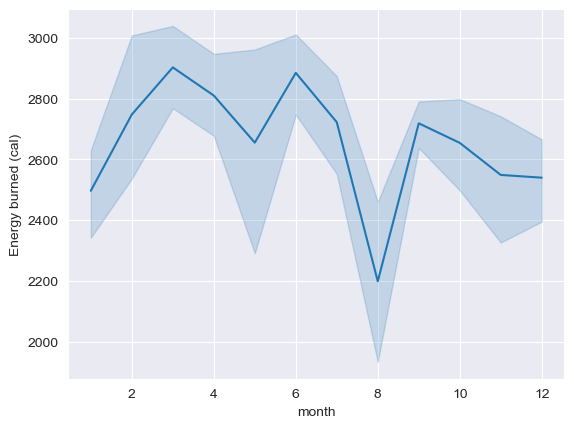

In [51]:
sns.lineplot(x='month', y='Energy burned (cal)', data=physiological_cycles, ci=95)

Hemos analizado la evolucion de las variables que estan relacionadas con el esfuerzo:
- Day Strain
- Energy burned (cal)

# 6.0 - EDA Analysing Data [PHYSIOLOGICAL CYCLES] - Correlacion de variables cuantitativas

## Recovery - Sleep efficiency

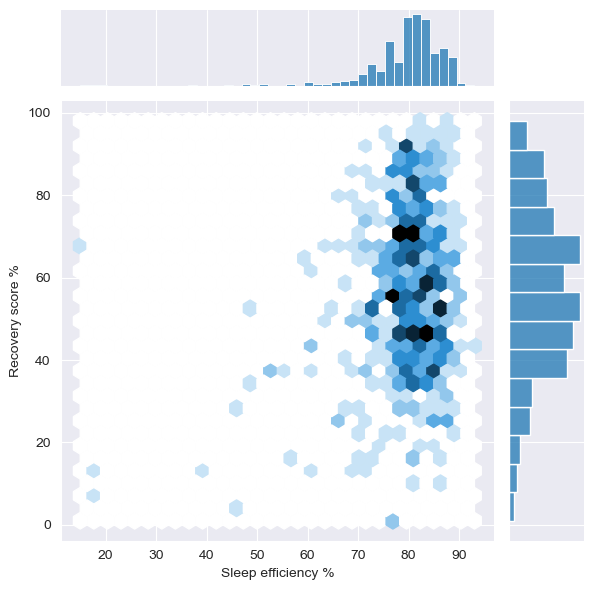

In [55]:
sns.jointplot(x='Sleep efficiency %', y='Recovery score %', data=physiological_cycles, kind='hex')

este grafico se interpreta de la siguiente manera: la distribucion de los datos es normal y la relacion es lineal. esto quiere decir que cuanto mayor es el Sleep efficiency, mayor es el Recovery score. dsitribucion de datos normal quiere decir que la media y la mediana son iguales. la ralcion lineal quiere decir que la pendiente es positiva. los puntos que se encuentran en la parte superior derecha de la gráfica son los que tienen un Sleep efficiency mayor y un Recovery score mayor. los puntos que se encuentran en la parte inferior izquierda de la gráfica son los que tienen un Sleep efficiency menor y un Recovery score menor.

## Recovery - Respiratory rate

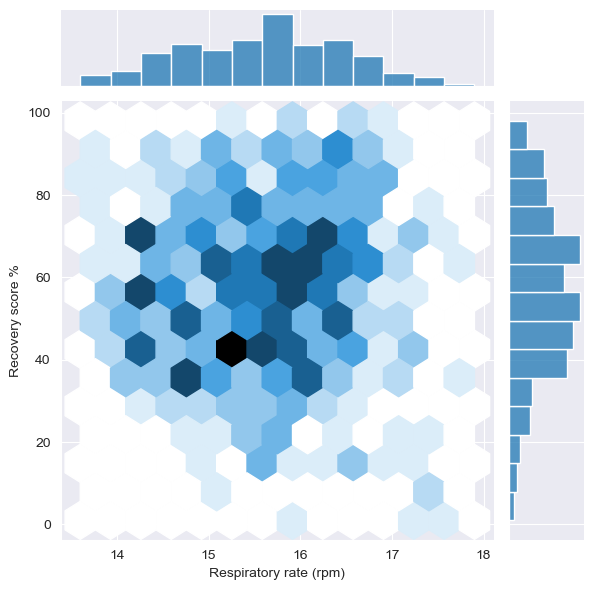

In [57]:
sns.jointplot(x='Respiratory rate (rpm)', y='Recovery score %', data=physiological_cycles, kind='hex')

Este grafico se interpreta de la siguiente manera: la distribucion de los datos es normal y la relacion es lineal. esto quiere decir que cuanto mayor es el Respiratory rate, mayor es el Recovery score. dsitribucion de datos normal quiere decir que la media y la mediana son iguales. la ralcion lineal quiere decir que la pendiente es positiva. los puntos que se encuentran en la parte superior derecha de la gráfica son los que tienen un Respiratory rate mayor y un Recovery score mayor. los puntos que se encuentran en la parte inferior izquierda de la gráfica son los que tienen un Respiratory rate menor y un Recovery score menor.

## Recovery - Skin temperature

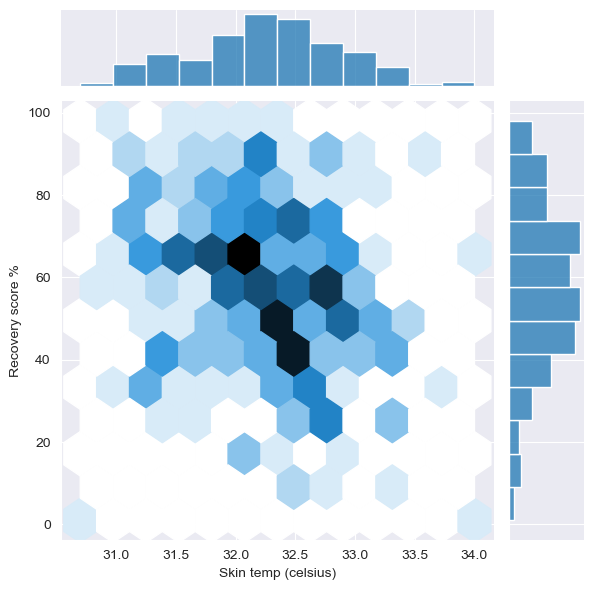

In [58]:
sns.jointplot(x='Skin temp (celsius)', y='Recovery score %', data=physiological_cycles, kind='hex')

Este grafico indica que la relacion entre Skin temp y Recovery score es lineal. esto quiere decir que cuanto mayor es el Skin temp, mayor es el Recovery score. la ralcion lineal quiere decir que la pendiente es positiva. los
puntos que se encuentran en la parte superior derecha de la gráfica son los que tienen un Skin temp mayor y un Recovery score mayor. los puntos que se encuentran en la parte inferior izquierda de la gráfica son los que
tienen un Skin temp menor y un Recovery score menor.

## Day Strain - Energy burned

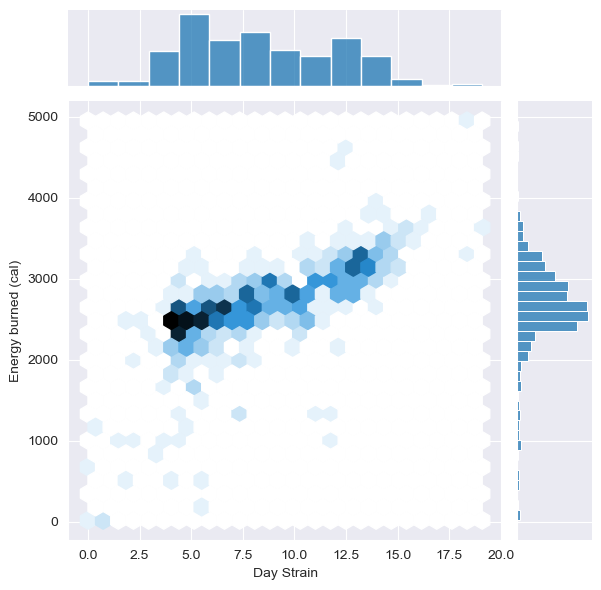

In [61]:
sns.jointplot(x='Day Strain', y='Energy burned (cal)', data=physiological_cycles, kind='hex')